In [1]:
print("hello world")

hello world


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
!ls -ltr ~/Downloads/datasets

total 345560
drwxr-xr-x 2 training training      4096 Oct 17  2016 ml-20m
-rw-r--r-- 1 training training 127744095 Mar 24  2017 stocks.csv
-rw-r--r-- 1 training training 150828752 Sep 13 15:33 creditcard-fraud.csv
drwxrwxr-x 2 training training      4096 Sep 13 20:35 mnist
-rw-rw-r-- 1 training training    133638 Sep 13 21:00 credit.csv
-rw-rw-r-- 1 training training  69055807 Sep 13 21:01 imdb-comments.json
-rw-rw-r-- 1 training training      5107 Sep 13 21:01 iris.csv
-rw-rw-r-- 1 training training     57459 Sep 13 21:01 istanbul-stock.csv
-rw-rw-r-- 1 training training       226 Sep 13 21:01 mobile-sales-data.csv
-rw-rw-r-- 1 training training      2436 Sep 13 21:01 startups.csv
drwxrwxr-x 2 training training      4096 Sep 13 21:01 kaggle-house-prices
-rw-rw-r-- 1 training training   4432265 Sep 13 23:51 Bible.txt
drwxrwxr-x 2 training training      4096 Sep 15 05:58 apple.stackexchange.com
-rw-rw-r-- 1 training training   1543413 Sep 15 06:55 Combined_Cycle_Power_Plant.csv
drwxrwxr

In [6]:
startups = pd.read_csv("/home/training/Downloads/datasets/startups.csv")

In [7]:
type(startups)

pandas.core.frame.DataFrame

In [8]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [10]:
startups.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

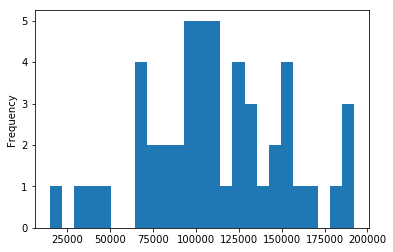

In [14]:
startups.Profit.plot.hist(bins = 25)

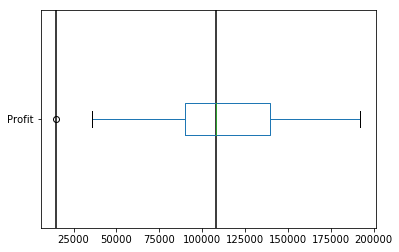

In [27]:
startups.Profit.plot.box(vert = False)
plt.vlines([np.median(startups.Profit), 14681.400000], ymin = 0, ymax = 10)

In [19]:
np.median(startups.Profit)

107978.19

In [26]:
startups.Profit.describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

In [23]:
iqr = startups.Profit.describe()["75%"] - startups.Profit.describe()["25%"]  

In [25]:
startups.Profit[startups.Profit < startups.Profit.describe()["25%"] - 1.5 * iqr]

49    14681.4
Name: Profit, dtype: float64

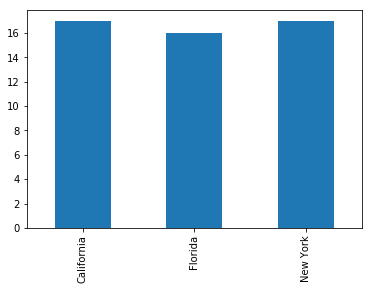

In [30]:
startups.State.value_counts().sort_index().plot.bar()

In [31]:
startups.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

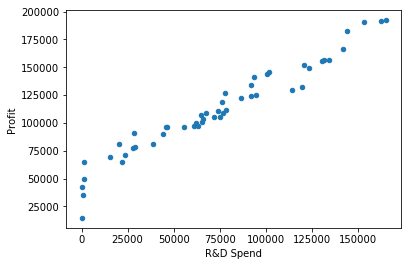

In [35]:
startups.plot.scatter(x='R&D Spend', y = 'Profit')

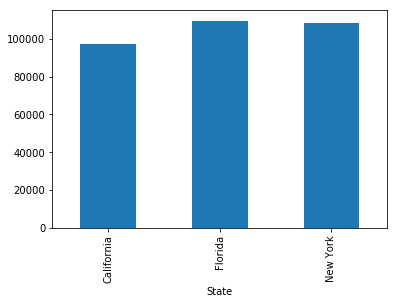

In [37]:
startups.groupby("State").Profit.median().plot.bar()

In [47]:
movies = pd.read_csv("~/Downloads/datasets/ml-latest-small/movies.csv")
ratings = pd.read_csv("~/Downloads/datasets/ml-latest-small/ratings.csv")
result = movies.merge(ratings, on="movieId")
result = result.groupby(["movieId", "title"])
result = result.rating.agg([np.mean, len])
result = result.query("len >= 100")
result = result.sort_values("mean", ascending = False)
result

,,mean,len
movieId,title,,
858,"Godfather, The (1972)",4.487500,200.0
318,"Shawshank Redemption, The (1994)",4.487138,311.0
1221,"Godfather: Part II, The (1974)",4.385185,135.0
50,"Usual Suspects, The (1995)",4.370647,201.0
527,Schindler's List (1993),4.303279,244.0
1193,One Flew Over the Cuckoo's Nest (1975),4.256944,144.0
608,Fargo (1996),4.256696,224.0
296,Pulp Fiction (1994),4.256173,324.0
2858,American Beauty (1999),4.236364,220.0


In [49]:
movies["C"] = "2"
movies.head()

,movieId,title,genres,C
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2
1,2,Jumanji (1995),Adventure|Children|Fantasy,2
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2
4,5,Father of the Bride Part II (1995),Comedy,2


In [54]:
movies.loc[100, "title"]

'Braveheart (1995)'

In [55]:
movies.iloc[100, 1]

'Braveheart (1995)'

In [50]:
movies.query("movieId == 100")

,movieId,title,genres,C
92,100,City Hall (1996),Drama|Thriller,2


In [53]:
movies.set_index("movieId").head()

,title,genres,C
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2
2,Jumanji (1995),Adventure|Children|Fantasy,2
3,Grumpier Old Men (1995),Comedy|Romance,2
4,Waiting to Exhale (1995),Comedy|Drama|Romance,2
5,Father of the Bride Part II (1995),Comedy,2


In [56]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [58]:
ratings.set_index("movieId").loc[100]

,userId,rating,timestamp
movieId,,,
100,18,4.0,856007279
100,30,4.0,945277812
100,55,3.0,855927437
100,70,4.0,853954577
100,80,2.0,844860266
100,162,3.0,852792221
100,173,4.0,876821498
100,224,4.0,828213150
100,232,5.0,955094079


In [60]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [61]:
from sklearn.linear_model import LinearRegression

In [65]:
X = startups.iloc[:, :3].values
y = startups.Profit
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [66]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
lr.coef_, lr.intercept_

(array([ 0.80571505, -0.02681597,  0.02722806]), 50122.192989865238)

In [71]:
result = pd.DataFrame({"predicted": lr.predict(X), "actual": y})

In [73]:
np.sqrt(np.mean((result.predicted - result.actual) ** 2)) #RMSE

8855.3444890151404

In [74]:
from sklearn.metrics import r2_score

In [76]:
r2_score(result.actual, result.predicted)

0.95074599406832461

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
            test_size = 0.3, random_state = 1)

In [79]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
result = pd.DataFrame({"predicted": lr.predict(X_test), "actual": y_test})
result

,actual,predicted
27,105008.31,115167.329092
35,96479.51,90541.823077
40,78239.91,75638.395576
38,81229.06,70250.340938
2,191050.39,180085.813190
3,182901.99,171993.614876
48,35673.41,48846.279462
29,101004.64,101247.381011
46,49490.75,58869.288416
31,97483.56,97152.312070


In [82]:
np.sqrt(np.mean((result.predicted - result.actual) ** 2)) #RMSE

8583.7286655710959

In [83]:
lr.coef_

array([ 0.77011884, -0.01413267,  0.03477756])

In [84]:
startups.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [86]:
np.corrcoef(startups['R&D Spend'], startups["Profit"])

array([[ 1.        ,  0.97290047],
       [ 0.97290047,  1.        ]])

In [87]:
np.corrcoef(startups['Administration'], startups["Profit"])

array([[ 1.        ,  0.20071657],
       [ 0.20071657,  1.        ]])

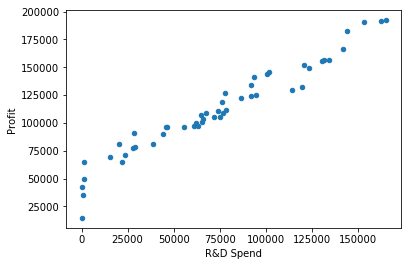

In [89]:
startups.plot.scatter(x = "R&D Spend", y = "Profit")

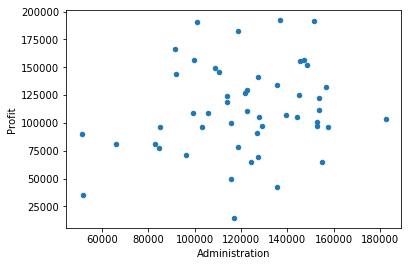

In [90]:
startups.plot.scatter(x = "Administration", y = "Profit")

In [91]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [97]:
pd.DataFrame(X_train_std).describe()

,0,1,2
count,3.500000e+01,3.500000e+01,3.500000e+01
mean,1.427430e-16,8.247371e-16,-2.886580e-16
std,1.014599e+00,1.014599e+00,1.014599e+00
min,-1.780398e+00,-2.831814e+00,-1.858365e+00
25%,-6.451171e-01,-6.452091e-01,-6.988028e-01
50%,-6.402107e-02,-3.660716e-02,2.709061e-01
75%,8.313136e-01,8.165818e-01,7.078304e-01
max,1.903231e+00,2.303671e+00,2.163970e+00


In [94]:
lr.fit(X_train_std, y_train)
lr.coef_

array([ 34568.77850023,   -361.5047217 ,   4079.09692439])